In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("ggplot")

In [2]:
data = pd.read_csv(r"C:\Users\91999\Desktop\GREWAL\DATA SCIENCE\Model Algorithms\8. K-Means Clustering\Experience Salary.csv")
data.head()

,Experience,Salary
0,14,1840
1,2,777
2,3,300
3,18,1700
4,5,999


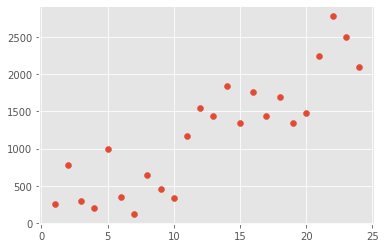

In [3]:
# Plotting the datapoints
plt.scatter(data.Experience, data.Salary);

In [4]:
# Importing KMeans cluster
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
# It predicts which point belongs to which cluster
y_predicted = km.fit_predict(data)                 # data includes the columns which are used in making clusters
y_predicted

array([1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       2, 2])

In [6]:
# Creating a new column which shows cluster numbering
data['Cluster'] = y_predicted
data.head()

,Experience,Salary,Cluster
0,14,1840,1
1,2,777,0
2,3,300,0
3,18,1700,1
4,5,999,1


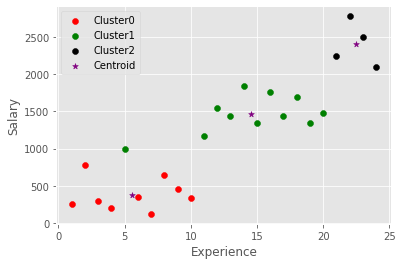

In [7]:
# Seperating these 3 clusters into 3 different dataframes
data0 = data[data.Cluster==0]
data1 = data[data.Cluster==1]
data2 = data[data.Cluster==2]

# Plotting each dataframe
plt.scatter(data0.Experience, data0.Salary, color='red', label='Cluster0')
plt.scatter(data1.Experience, data1.Salary, color='green', label='Cluster1')
plt.scatter(data2.Experience, data2.Salary, color='black', label='Cluster2')

#Plotting centres of cluster
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='Centroid')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()

In [8]:
km.cluster_centers_          # Centroids 

array([[   5.55555556,  380.22222222],
       [  14.54545455, 1459.81818182],
       [  22.5       , 2407.5       ]])

### In case if we need Scaling

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# scaling Salary column
# scaler.fit(data[['Salary']])
# data['Salary'] = scaler.transform(data[['Salary']])

# Scaling Experience column
# scaler.fit(data[['Experience']])
# data['Experience'] = scaler.transform(data[['Experience']])

# data.head()

### Elbow Plot

In [10]:
# Elbow Technique

sse = []                      # Sum of squared errrors
k_rng = range(1,10)           # defining the range for K
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data)
    sse.append(km.inertia_)

In [11]:
sse

[13878475.791666666,
 3692056.157142857,
 1258482.1414141415,
 795483.2083333333,
 454823.4047619048,
 282125.5714285715,
 181381.42857142858,
 137631.30000000002,
 94784.25]

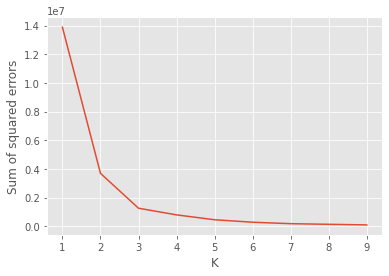

In [12]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng, sse)